<h1 style="text-align: center;">ANALYSIS</h1>

Now that we have our `heart.csv` file from before, we can proceed to use it for some inferential statistics, EDA and analysis

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Iplot method
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## EDA

In [2]:
# Read data
data = pd.read_csv('data/kaggle/heart.csv')

In [3]:
# Take a look
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Sample Random Data
data.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
665,42,M,ASY,136,315,0,Normal,125,Y,1.8,Flat,1
634,40,M,TA,140,199,0,Normal,178,Y,1.4,Up,0
179,46,F,ASY,130,238,0,Normal,90,N,0.0,Up,0
182,52,M,ASY,140,404,0,Normal,124,Y,2.0,Flat,1
408,59,M,ASY,110,0,1,Normal,94,N,0.0,Flat,1


In [5]:
# Get data dimensions
print(data.shape)
print("There are {} rows and {} columns in the given dataset.".format(data.shape[0], data.shape[1]))

(918, 12)
There are 918 rows and 12 columns in the given dataset.


In [6]:
# Get all column names:
print("The names of the {} columns are:".format(data.shape[1]))
for index, name in enumerate(data.columns):
    print("{}. {}".format(index+1, name))

The names of the 12 columns are:
1. Age
2. Sex
3. ChestPainType
4. RestingBP
5. Cholesterol
6. FastingBS
7. RestingECG
8. MaxHR
9. ExerciseAngina
10. Oldpeak
11. ST_Slope
12. HeartDisease


So far, we've come to the following conclusion.\
There are `12` columns in the dataset which can be described as follows:
- **Age:** Age of the patient
- **Sex:** Sex of the  patient
- **Chest Pain Type:** Chest Pain Type (Typical Angine, Atypical Angina, Non-Anginal Pain and  Asymptomatic)
- **RestingBP:** Resting Blood Pressure
- **Cholesterol:** Cholesterol level of patient
- **FastingBS:** Fasting Blood Sugar
- **RestingECG:** Resting Electorcardiogram Results (Normal, ST or LVH)
- **MaxHR:** Maximum Heart Rate
- **ExerciseAngina:** Exercise Induced Angina
- **Oldpeak:** Oldpeak
- **ST_Slope:** Slope of Peak Exercise (Up, Down or Flat)
- **HeartDisease:** Patient has heartdisease (1) or doesn't (0)

In [7]:
# Check for null values
print("Null values present in each column:")
data.isnull().sum()

Null values present in each column:


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
# Check for duplicate data
print("Duplicate data present: {}".format(data.duplicated().sum()))

Duplicate data present: 0


In [9]:
# Check for data types
print("Type of Data:")
data.dtypes

Type of Data:


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

So far, we've come to the conclusion that the dataset has 0 null or duplicate values. Also, of the data given to us some is quantitative (numerical) and some is ordinal (categorical).

In [10]:
# Separate quantitative and ordinal values
quantitative = data.select_dtypes('number').columns
print('Quantitative Columns:', end = ' ')
for column in quantitative:
    print(column, end = ', ')
ordinal = data.select_dtypes('object').columns
print()
print()
print('Ordinal Columns:', end = ' ')
for column in ordinal:
    print(column, end = ', ')

Quantitative Columns: Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease, 

Ordinal Columns: Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope, 

In [11]:
# Check for unique values
print("Quantitative Columns:")
print('---------------------')
for column in quantitative:
    print("{} has {} unique values.".format(column, data[column].nunique()))
print()
print("Ordinal Columns:")
print('----------------')
for column in ordinal:
    print("{} has {} unique values.".format(column, data[column].nunique()))


Quantitative Columns:
---------------------
Age has 50 unique values.
RestingBP has 67 unique values.
Cholesterol has 222 unique values.
FastingBS has 2 unique values.
MaxHR has 119 unique values.
Oldpeak has 53 unique values.
HeartDisease has 2 unique values.

Ordinal Columns:
----------------
Sex has 2 unique values.
ChestPainType has 4 unique values.
RestingECG has 3 unique values.
ExerciseAngina has 2 unique values.
ST_Slope has 3 unique values.


## Quantitative(Numerical) Column Analysis

In [12]:
# Take a look
data[quantitative].head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [13]:
# Describe
data[quantitative].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Based on the above we get a rough idea of the range of various features
- Age: 28 to 77
- RestingBP: 0 to 200
- Cholesterol: 0 to 603
- FastingBS: 0 to 1
- MaxHR: 60 to 202
- Oldpeak: -2.6 to 6.2

Now, 0 Cholesterol and FastingBS makes sense but 0 RestingBP doesn't make any sense so we will explicitly check it out

In [14]:
data[data['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


As seen above, there is only 1 such value present (possibly indicating a dead patient) and this value may be an outlier. We can confirm this using a box plot

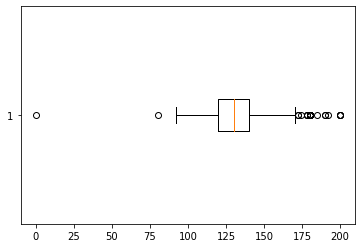

In [15]:
# Boxplot with RestingBP = 0 value
plt.boxplot(data['RestingBP'].values, vert = False);

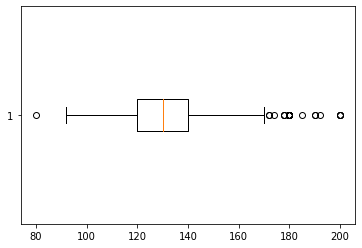

In [16]:
# Boxplot with RestingBP = 0 value removed
plt.boxplot(data[data['RestingBP'] != 0]['RestingBP'].values, vert=False);

Thus, it can be confirmed that this value is indeed an outlier. Now we can either keep this outlier or remove it, but we'll remove it in this case as we want to analyse only on alive patients and not deceased patients with Blood Pressure equivalent to zero. Although RestingBP still has some outliers as indicating by the boxplot but we'll keep them as they are still valid patient observations

In [17]:
# Removing Outlier from data
data = data[data['RestingBP'] != 0]

We can also draw box plots for all quantitative variables to confirm this behaviour

In [18]:
data[quantitative].iplot(kind='box', title='Boxplot of Quantative Values', boxpoints="all")

Based on the above boxplot, it appears that FastingBS and HeartDisease are rather Categorical variables. We can confirm this using Histograms

In [19]:
data[quantitative].iplot(kind = 'histogram',  subplots = True, bins = 50)

Based on the above plot, we come to two conclusions:
- FastingBS and HeartDisease are categorical variables with possible values either 0 or 1
- The rest of the variables seem to follow a normal distribution. This can also be confirmed using Statistical Tests on some sampled data

In [20]:
print("Normality Test: ")
print("---------------")
data_sampled = data.sample(40)
for col in quantitative:
    print("{} p-value: {}".format(col, stats.normaltest(data_sampled[col]).pvalue))

Normality Test: 
---------------
Age p-value: 0.6568966849429738
RestingBP p-value: 0.1358932302890244
Cholesterol p-value: 0.12296425246046978
FastingBS p-value: 0.009531498142337677
MaxHR p-value: 0.04052377700346332
Oldpeak p-value: 8.990606487108889e-07
HeartDisease p-value: 1.517192882456554e-303


Thus, based on the above tests it can be safely assumed that Age, RestingBS, Cholesterol, MaxHR and Oldpeak values come from a normal distribution whereas FastingBS and HeartDisease do not follow a Normal Distibution (as we proved earlier since they were categorical variables) and so we will be moving them to our list of categorical values